In [ ]:
import numpy as np
import pandas as pd

from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
import json

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv(f'PATH/over_under_sampling.csv.gz',compression='gzip',lineterminator='\n');

In [ ]:
data.head()

,id,created_at,samplingModel,modelName,selectedFeatures,fullResult,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_roc_auc,train_roc_auc,test_precision,train_precision
0,1,2022-06-15 14:50:28,all,xgb,"[""favourites_count"", ""friends_growth_rate"", ""f...","[{""fit_time"":80.3857235909,""score_time"":0.2791...",451.601921,1.669223,0.986156,0.994444,0.983308,0.993299,0.980308,0.990226,0.997399,0.999676,0.986328,0.996391
1,2,2022-06-15 14:50:28,SMOTEENN,xgb,"[""favourites_count"", ""friends_growth_rate"", ""f...","[{""fit_time"":92.3197753429,""score_time"":0.3644...",398.586081,1.498911,0.998933,1.000000,0.998934,1.000000,0.998933,1.000000,0.999992,1.000000,0.998936,1.000000
2,3,2022-06-15 14:50:28,SMOTETomek,xgb,"[""favourites_count"", ""friends_growth_rate"", ""f...","[{""fit_time"":94.9419465065,""score_time"":0.3975...",424.708520,1.804560,0.989838,0.996786,0.989825,0.996781,0.988662,0.995385,0.998763,0.999902,0.990993,0.998180
3,5,2022-06-15 14:55:48,all,ab,"[""favourites_count"", ""friends_growth_rate"", ""f...","[{""fit_time"":81.600933075,""score_time"":0.62273...",392.215550,2.396818,0.978912,0.979612,0.974497,0.975339,0.968537,0.969534,0.996095,0.996581,0.980536,0.981214
4,6,2022-06-15 15:03:10,SMOTEENN,ab,"[""favourites_count"", ""friends_growth_rate"", ""f...","[{""fit_time"":94.454324007,""score_time"":0.60094...",422.772154,2.801829,0.997029,0.997367,0.997035,0.997373,0.996549,0.996872,0.999906,0.999964,0.997523,0.997875


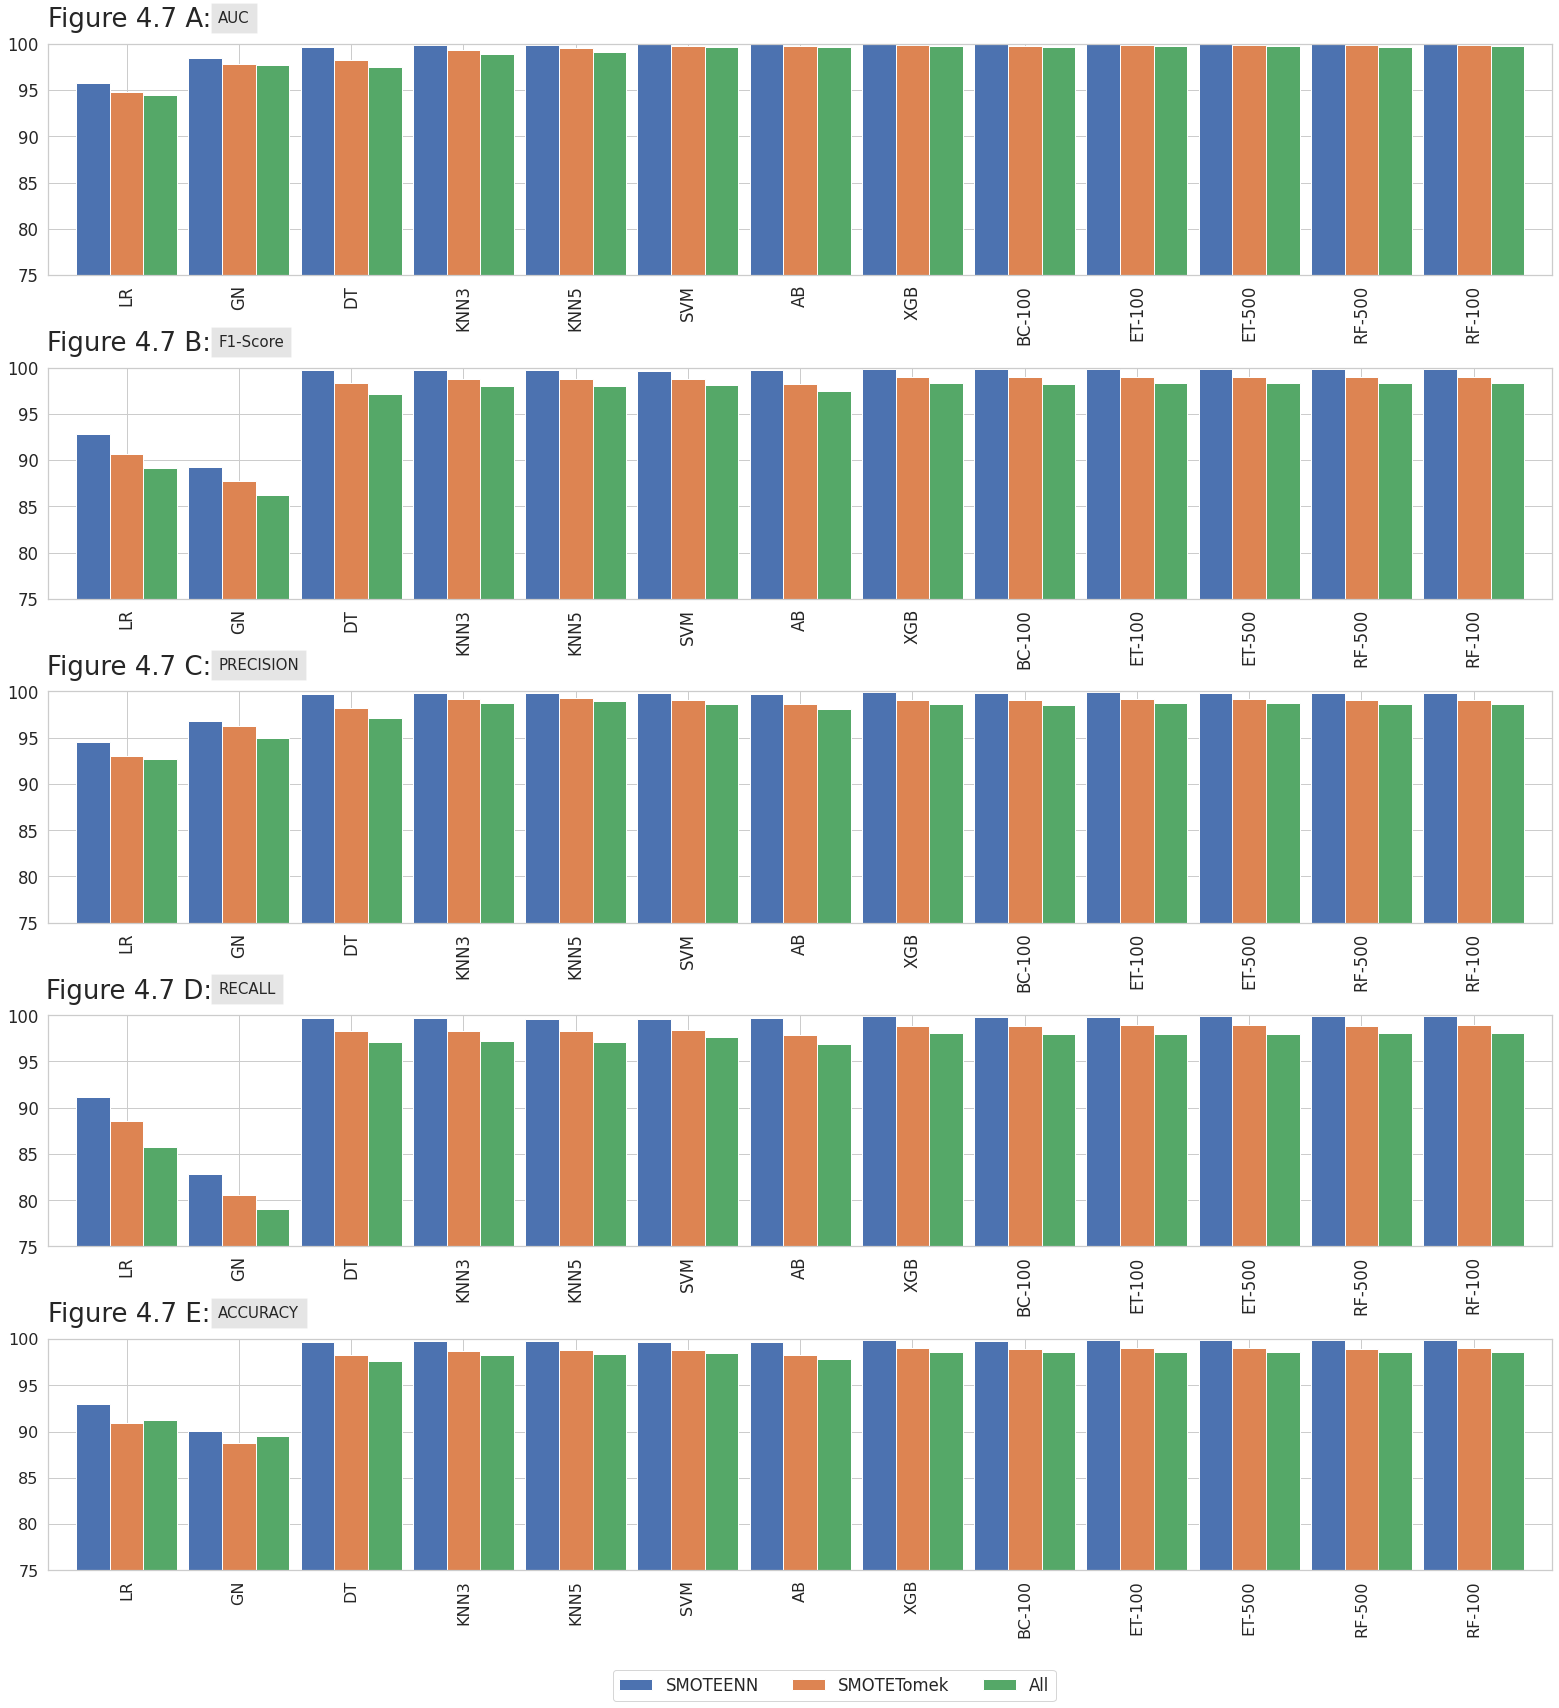

In [ ]:
algorithm_dic={
    'roc_auc':'AUC',
    'f1':'F1-Score',
    'precision':'PRECISION',
    'recall':'RECALL',
    'accuracy':'ACCURACY',
}

sns.set(style="whitegrid",font_scale = 1.5)

fig, axs = plt.subplots(ncols=1,nrows=5, figsize=(22,24))

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

y_label=["A","B","C","D","E"]



for index,selection_type in enumerate(["roc_auc","f1","precision","recall","accuracy"]):


  df=data.loc[:,['samplingModel','modelName',f'test_{selection_type}']]
  df['TOTAL']=df[f'test_{selection_type}'].apply(lambda x: round(x*100, 2))
  df=df.pivot(index='modelName', columns='samplingModel', values='TOTAL')
  df.reset_index(inplace=True)
  df.columns=["model","SMOTEENN","SMOTETomek","All"]


  df.set_index('model',inplace=True)
  df=df.reindex(['lr','gn','dt','knn3','knn5','svc_n','ab','xgb','bc_100','et_100','et_500','rf_100','rf_500'])
  df.rename(index={'lr':'LR','gn':'GN','dt':'DT','knn3':'KNN3','knn5':'KNN5','svc_n':'SVM','ab':'AB','xgb':'XGB','bc_100':'BC-100','et_100':'ET-100','et_500':'ET-500','rf_500':'RF-100','rf_100':'RF-500'},inplace=True)
  

  ax=df.plot(kind="bar",ax=axs[index],width=0.9)


  ax.set_ylim([75, 100])
  ax.set_xlabel('')


  ax.set_xlabel(f'Figure 4.7 {y_label[index]}:',rotation=0,labelpad=0,fontsize=26)
  ax.xaxis.set_label_coords(0.054,1.16)


  if index!=4:
    ax.get_legend().remove()
  else:
    ax.legend(loc="lower left", ncol=4,bbox_to_anchor=(0.37, -0.6))


 

  ax.set_title("{}".format(
      algorithm_dic[selection_type]), 
      pad=0.5,
      y=1.11,
      x=0.113,
      fontsize=15, 
      loc='left',
      va="center",
      bbox=dict(facecolor='gray',alpha=0.2,boxstyle='square,pad=0.5')
  )


  ax.set_xticks(range(len(df)))
  ax.set_xticklabels(df.index)



fig.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0.4)
plt.show()

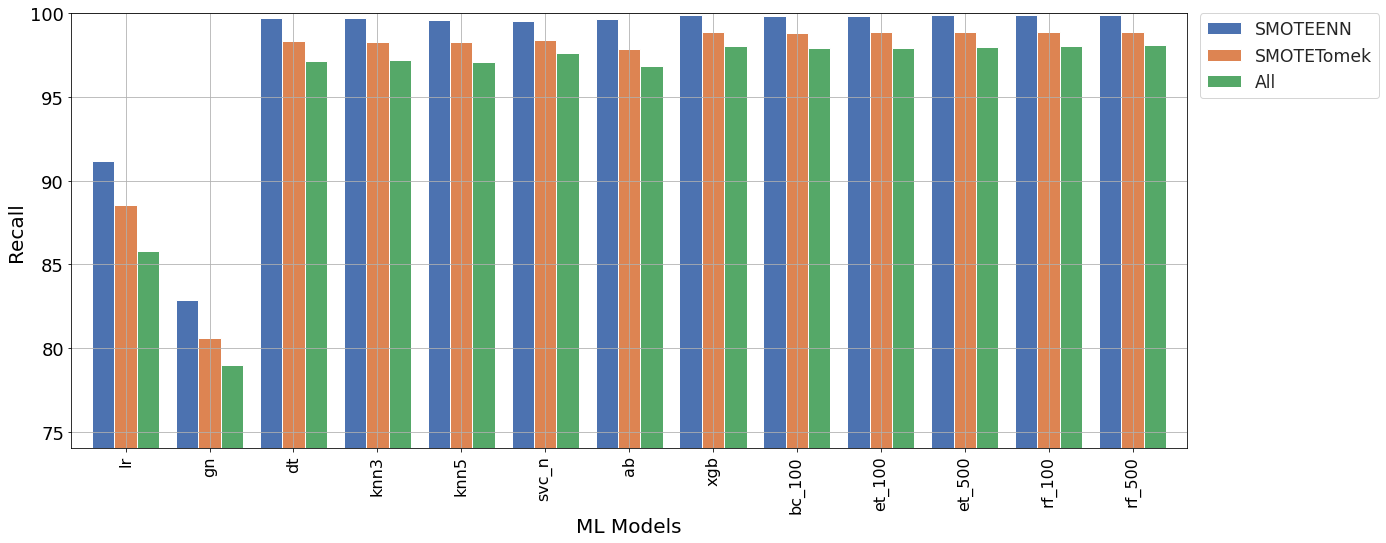

In [ ]:
df_recall=data.loc[:,['samplingModel','modelName','test_recall']]
df_recall['TOTAL']=df_recall['test_recall'].apply(lambda x: round(x*100, 2))
df_recall=df_recall.pivot(index='modelName', columns='samplingModel', values='TOTAL')
df_recall.reset_index(inplace=True)
df_recall.columns=["model","SMOTEENN","SMOTETomek","All"]


df_recall.set_index('model',inplace=True)
df_recall=df_recall.reindex(["lr","gn",'dt','knn3','knn5','svc_n','ab','xgb','bc_100','et_100','et_500','rf_100','rf_500'])

fig, ax = plt.subplots(figsize=(20, 8))


sns.set(style="whitegrid")

df_recall.plot(kind="bar",ax=ax,width=0.8)


ax.legend(loc="upper right", bbox_to_anchor=(1.18, 1.02),fontsize='x-large')

ax.set_ylim([df_recall.to_numpy().min()-5, 100])

plt.xticks(size = 16)
plt.yticks(size = 18)

plt.xlabel('ML Models',size=20)
plt.ylabel('Recall',size = 20)

plt.show()

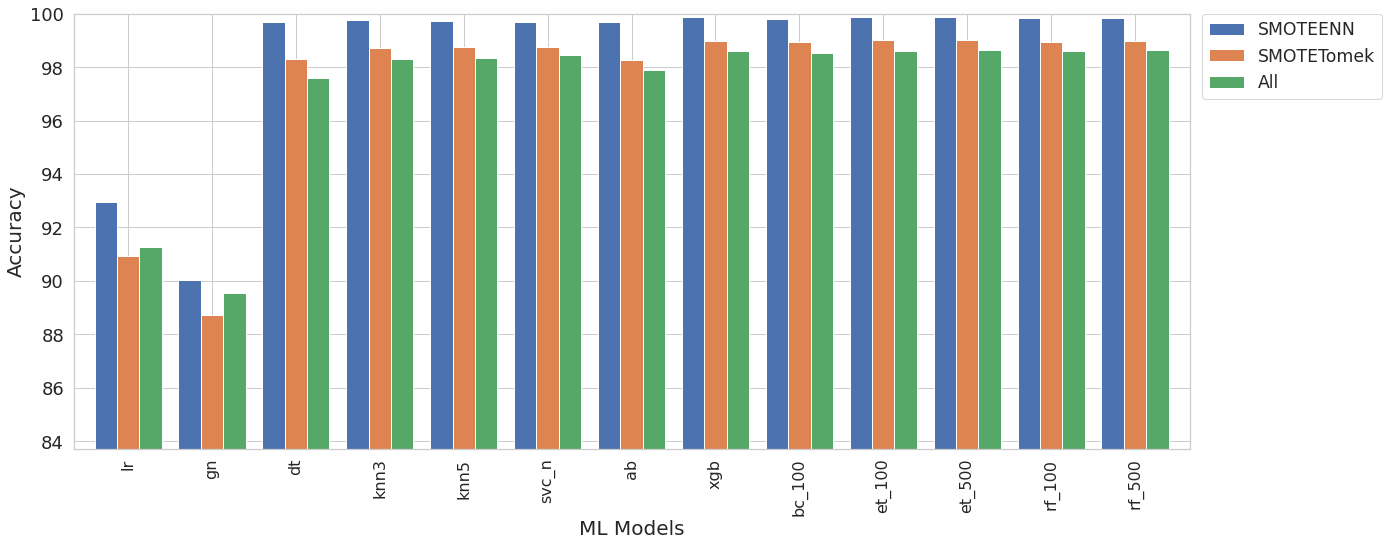

In [ ]:
df_accuracy=data.loc[:,['samplingModel','modelName','test_accuracy']]

df_accuracy['TOTAL']=df_accuracy['test_accuracy'].apply(lambda x: round(x*100, 2))
df_accuracy=df_accuracy.pivot(index='modelName', columns='samplingModel', values='TOTAL')
df_accuracy.reset_index(inplace=True)
df_accuracy.columns=["model","SMOTEENN","SMOTETomek","All"]


df_accuracy.set_index('model',inplace=True)
df_accuracy=df_accuracy.reindex(["lr","gn",'dt','knn3','knn5','svc_n','ab','xgb','bc_100','et_100','et_500','rf_100','rf_500'])

fig, ax = plt.subplots(figsize=(20, 8))


sns.set(style="whitegrid")

df_accuracy.plot(kind="bar",ax=ax,width=0.8)


ax.legend(loc="upper right", bbox_to_anchor=(1.18, 1.02),fontsize='x-large')

ax.set_ylim([df_accuracy.to_numpy().min()-5, 100])

plt.xticks(size = 16)
plt.yticks(size = 18)

plt.xlabel('ML Models',size=20)
plt.ylabel('Accuracy',size = 20)

plt.show()

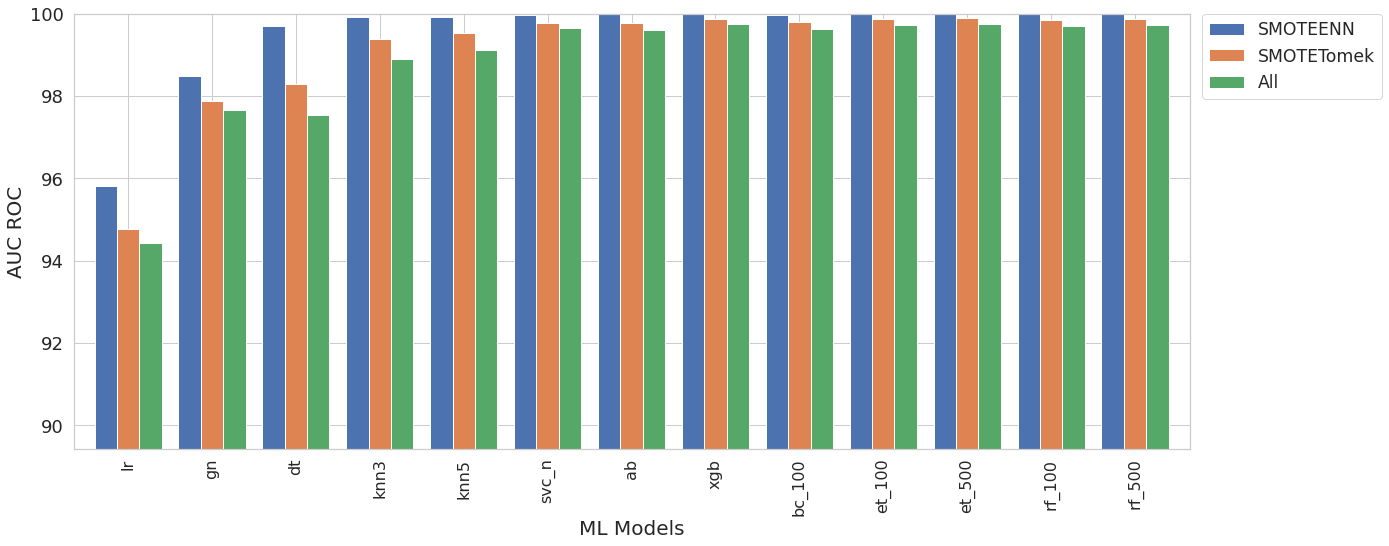

In [ ]:
df_accuracy=data.loc[:,['samplingModel','modelName','test_roc_auc']]

df_accuracy['TOTAL']=df_accuracy['test_roc_auc'].apply(lambda x: round(x*100, 2))
df_accuracy=df_accuracy.pivot(index='modelName', columns='samplingModel', values='TOTAL')
df_accuracy.reset_index(inplace=True)
df_accuracy.columns=["model","SMOTEENN","SMOTETomek","All"]


df_accuracy.set_index('model',inplace=True)
df_accuracy=df_accuracy.reindex(["lr","gn",'dt','knn3','knn5','svc_n','ab','xgb','bc_100','et_100','et_500','rf_100','rf_500'])

fig, ax = plt.subplots(figsize=(20, 8))


sns.set(style="whitegrid")

df_accuracy.plot(kind="bar",ax=ax,width=0.8)


ax.legend(loc="upper right", bbox_to_anchor=(1.18, 1.02),fontsize='x-large')

ax.set_ylim([df_accuracy.to_numpy().min()-5, 100])

plt.xticks(size = 16)
plt.yticks(size = 18)

plt.xlabel('ML Models',size=20)
plt.ylabel('AUC ROC',size = 20)

plt.show()

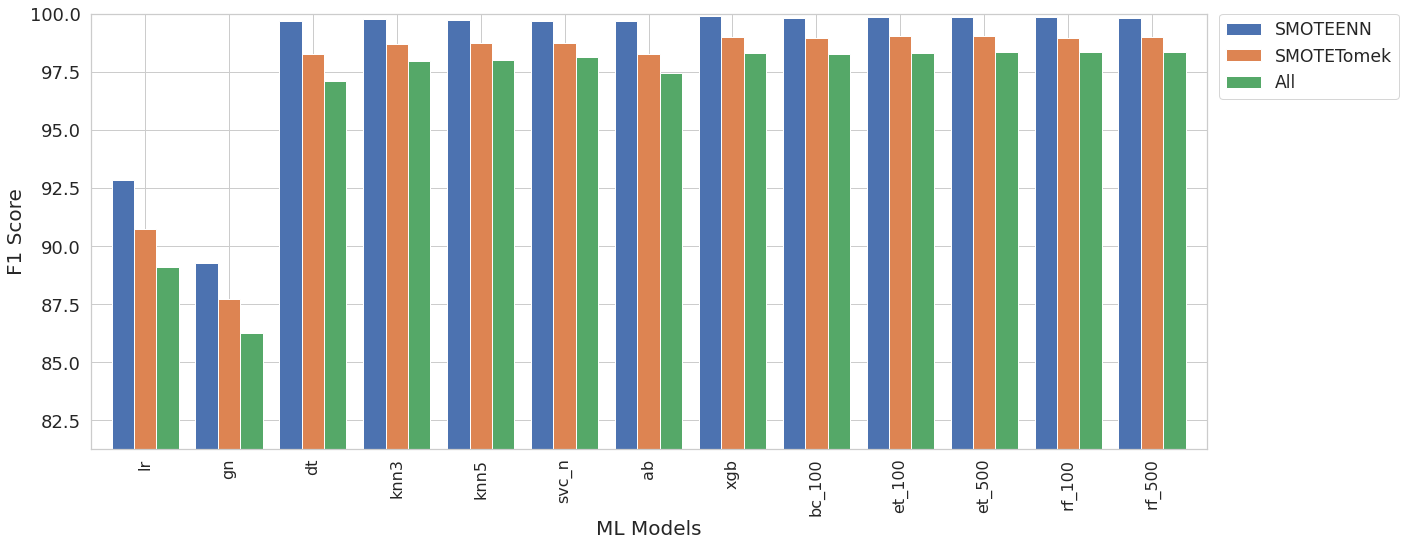

In [ ]:
df_accuracy=data.loc[:,['samplingModel','modelName','test_f1']]

df_accuracy['TOTAL']=df_accuracy['test_f1'].apply(lambda x: round(x*100, 2))
df_accuracy=df_accuracy.pivot(index='modelName', columns='samplingModel', values='TOTAL')
df_accuracy.reset_index(inplace=True)
df_accuracy.columns=["model","SMOTEENN","SMOTETomek","All"]


df_accuracy.set_index('model',inplace=True)
df_accuracy=df_accuracy.reindex(["lr","gn",'dt','knn3','knn5','svc_n','ab','xgb','bc_100','et_100','et_500','rf_100','rf_500'])

fig, ax = plt.subplots(figsize=(20, 8))


sns.set(style="whitegrid")

df_accuracy.plot(kind="bar",ax=ax,width=0.8)


ax.legend(loc="upper right", bbox_to_anchor=(1.18, 1.02),fontsize='x-large')

ax.set_ylim([df_accuracy.to_numpy().min()-5, 100])

plt.xticks(size = 16)
plt.yticks(size = 18)

plt.xlabel('ML Models',size=20)
plt.ylabel('F1 Score',size = 20)

plt.show()